In [34]:
import math
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
!ls /content/drive/MyDrive/

'26 jan'					 IMG_20220810_160817.jpg
 29.docx					'IR-assignment-2-data (2).txt'
'B6912C33-B0BE-4158-8F2B-F64C0A49D44A (1).pdf'	'IR assignment 2.gdoc'
 B6912C33-B0BE-4158-8F2B-F64C0A49D44A.pdf	 Kasoundhan_MT22115.gdoc
 Classroom					 MT22115.jpg
'Coding Preparation.gsheet'			'MT22115_Palak Kasoundhan.pdf'
'Colab Notebooks'				'Photos bowling'
'DOS ATTACK.pdf'				 sample.csv
 FB1.pdf					 Structure_data.gslides
 FB.pdf						 test.csv
'Feature Bug.pdf'				 train.csv
 IMG_20210925_120128.jpg


In [37]:
dataframe = pd.read_csv('/content/drive/MyDrive/IR-assignment-2-data (2).txt',delimiter=' ',header = None)

In [38]:
dataframe.head(5)

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0,NaN
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,NaN
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0,NaN
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35,NaN
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0,NaN


In [39]:
#select the queries with qid:4 
condition = dataframe[1] == 'qid:4'
dataframe_id_q4 = dataframe[condition]
dataframe_id_q4
# print(dataframe_id_q4)

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0,NaN
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,NaN
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0,NaN
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35,NaN
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:35,129:1,130:153,131:4872,132:9,133:55,134:0,135:0,136:0,NaN
99,1,qid:4,1:3,2:0,3:3,4:2,5:3,6:1,7:0,8:1,...,128:367,129:6,130:153,131:2383,132:18,133:99,134:0,135:16,136:11.3166666666667,NaN
100,2,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,128:0,129:0,130:49182,131:26966,132:15,133:69,134:0,135:193,136:21.9355595468361,NaN
101,1,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,128:0,129:1,130:42877,131:26562,132:12,133:24,134:0,135:56,136:62.9206042323688,NaN


Creating a file that rearranges the query-url pairs in order of the maximum DCG (discounted cumulative gain)

In [40]:
#function to create a list to store the tuples
def index_score_list(df):
    # Create an empty list to store the tuples
    list_tuples = []
    
    # Loop over each row in the DataFrame
    for index in df.index:
        # Extract the relevance score from the first column
        rel_score = df.loc[index, 0]
        # Create a tuple with the index and relevance score
        tuple_data = (index, rel_score)
        # Append the tuple to the list
        list_tuples.append(tuple_data)
    # Return the list of tuples
    return list_tuples


In [41]:
indexRelList = index_score_list(dataframe_id_q4)
indexRelList

[(0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 1),
 (5, 0),
 (6, 1),
 (7, 3),
 (8, 0),
 (9, 0),
 (10, 1),
 (11, 0),
 (12, 0),
 (13, 1),
 (14, 0),
 (15, 0),
 (16, 0),
 (17, 1),
 (18, 2),
 (19, 2),
 (20, 1),
 (21, 2),
 (22, 2),
 (23, 0),
 (24, 1),
 (25, 2),
 (26, 0),
 (27, 0),
 (28, 0),
 (29, 1),
 (30, 0),
 (31, 0),
 (32, 1),
 (33, 0),
 (34, 2),
 (35, 0),
 (36, 2),
 (37, 2),
 (38, 1),
 (39, 0),
 (40, 2),
 (41, 0),
 (42, 0),
 (43, 0),
 (44, 0),
 (45, 0),
 (46, 0),
 (47, 0),
 (48, 0),
 (49, 0),
 (50, 0),
 (51, 0),
 (52, 2),
 (53, 1),
 (54, 0),
 (55, 1),
 (56, 0),
 (57, 0),
 (58, 2),
 (59, 0),
 (60, 1),
 (61, 2),
 (62, 2),
 (63, 0),
 (64, 0),
 (65, 0),
 (66, 1),
 (67, 0),
 (68, 2),
 (69, 0),
 (70, 0),
 (71, 0),
 (72, 1),
 (73, 0),
 (74, 1),
 (75, 1),
 (76, 2),
 (77, 0),
 (78, 0),
 (79, 0),
 (80, 0),
 (81, 0),
 (82, 1),
 (83, 1),
 (84, 1),
 (85, 1),
 (86, 0),
 (87, 0),
 (88, 1),
 (89, 0),
 (90, 2),
 (91, 0),
 (92, 1),
 (93, 0),
 (94, 0),
 (95, 0),
 (96, 1),
 (97, 0),
 (98, 0),
 (99, 1),
 (100, 2),

First Objective

In [42]:
def sort_list(temporary_list):
  second_element = lambda item: item[1]
  # Sort the list using the lambda function(second element)in the tuple as the key
  temporary_list.sort(key=second_element, reverse=True)
  # Return the sorted list
  return temporary_list

In [43]:
sort_list(indexRelList)
indexRelList


[(7, 3),
 (18, 2),
 (19, 2),
 (21, 2),
 (22, 2),
 (25, 2),
 (34, 2),
 (36, 2),
 (37, 2),
 (40, 2),
 (52, 2),
 (58, 2),
 (61, 2),
 (62, 2),
 (68, 2),
 (76, 2),
 (90, 2),
 (100, 2),
 (4, 1),
 (6, 1),
 (10, 1),
 (13, 1),
 (17, 1),
 (20, 1),
 (24, 1),
 (29, 1),
 (32, 1),
 (38, 1),
 (53, 1),
 (55, 1),
 (60, 1),
 (66, 1),
 (72, 1),
 (74, 1),
 (75, 1),
 (82, 1),
 (83, 1),
 (84, 1),
 (85, 1),
 (88, 1),
 (92, 1),
 (96, 1),
 (99, 1),
 (101, 1),
 (0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (5, 0),
 (8, 0),
 (9, 0),
 (11, 0),
 (12, 0),
 (14, 0),
 (15, 0),
 (16, 0),
 (23, 0),
 (26, 0),
 (27, 0),
 (28, 0),
 (30, 0),
 (31, 0),
 (33, 0),
 (35, 0),
 (39, 0),
 (41, 0),
 (42, 0),
 (43, 0),
 (44, 0),
 (45, 0),
 (46, 0),
 (47, 0),
 (48, 0),
 (49, 0),
 (50, 0),
 (51, 0),
 (54, 0),
 (56, 0),
 (57, 0),
 (59, 0),
 (63, 0),
 (64, 0),
 (65, 0),
 (67, 0),
 (69, 0),
 (70, 0),
 (71, 0),
 (73, 0),
 (77, 0),
 (78, 0),
 (79, 0),
 (80, 0),
 (81, 0),
 (86, 0),
 (87, 0),
 (89, 0),
 (91, 0),
 (93, 0),
 (94, 0),
 (95, 0),
 (97, 0)

In [44]:
sorted_indexRelList = sort_list(indexRelList)
# Saving in a file
np.savetxt("sorted_indexRelList.txt", sorted_indexRelList, fmt="%s")


In [45]:
def total_no_of_files(temporary_list):
    # Initialize a list with four elements, each representing the count of files with a relevance score of 0, 1, 2 or 3
    rel_score_count_list = [0] * 4
    # Loop through each tuple in the list
    for i in range(len(temporary_list)):
        # Increment the count for the relevance score of the current tuple
        rel_score = temporary_list[i][1]
        rel_score_count_list[rel_score] += 1
    
    # Print the count of files for each relevance score in a specific format
    print(str(rel_score_count_list[3]) + "! * " + str(rel_score_count_list[2]) + "! * " + str(rel_score_count_list[1]) + "! * " + str(rel_score_count_list[0]) + "!")
    
    # Calculate the product of the factorials of the counts
    return math.factorial(rel_score_count_list[3]) * math.factorial(rel_score_count_list[2]) * math.factorial(rel_score_count_list[1]) * math.factorial(rel_score_count_list[0])


In [46]:
print("The total number of files with (max) dcg are:  ", total_no_of_files(indexRelList))

1! * 17! * 26! * 59!
The total number of files with (max) dcg are:   19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000


Second Objective

In [47]:
def maximum_Dcg(temporary_list):
  max_dcg = 0
  for j in range(len(temporary_list)):
    # If this is the first item, set the maximum DCG to its relevance score
    if j == 0:
      max_dcg = temporary_list[j][1]
    else:
      # Calculating DCG for the current item
      rel_score = temporary_list[j][1]
      ranking = j + 1
      dcg = rel_score / math.log2(ranking) 
      # Adding the DCG to the maximum DCG
      max_dcg =max_dcg+ dcg
  #Return
  return max_dcg

In [48]:
dcg_max = maximum_Dcg(indexRelList)
print("The maximum DCG for the ideal case is: ",dcg_max)

The maximum DCG for the ideal case is:  20.989750804831445


In [49]:
def nDCG(df,stopping_Index):
    temporary_list = []
    index_list = [idx for idx in df.index]
    rel_list = [rel for rel in df[0]]
    for j in range(len(index_list)):
        temporary_list.append((index_list[j],rel_list[j]))
    dcg = 0 
    for j in range(len(temporary_list)):
      if j == 0:
              dcg = temporary_list[j][1]
      else:
              dcg =dcg+ temporary_list[j][1]/math.log2(j+1) 
      if( j == stopping_Index ):
          break
    dcg = dcg/dcg_max 
    return dcg

In [50]:
entire_ndcg = nDCG(dataframe_id_q4,-100) #nDCG at entire dataset
ndcg_at_50 = nDCG(dataframe_id_q4,50) #nDCG at position 50
print("The calculated NDCG at postion 50 is:",ndcg_at_50)
print("The calculated NDCG for entire dataset:",entire_ndcg)

The calculated NDCG at postion 50 is: 0.3521042740324887
The calculated NDCG for entire dataset: 0.5979226516897831


Third Objective

In [51]:
def rel_Idf(df):
    temporary_list = []
    rel_list = df[0].tolist() # assume relevance scores are in column 0
    idf_list = df[76].tolist() # assume IDF scores are in column 76 for (75 as indexing start from 0)
    for j in range(len(rel_list)):
        idf_score_string = idf_list[j] 
        idf_score_float = float(idf_score_string.split(':')[1]) 
        # Create a tuple of relevance score and IDF score and append it to the temporary_list
        temporary_list.append((rel_list[j], idf_score_float))
    # Sort the temporary_list in descending order by IDF score
    temporary_list = sorted(temporary_list, key=lambda t: t[1], reverse=True)
    return temporary_list


In [52]:
def find_num_docs(temporary_list):
    number_rel_docs = 0
    for doc in temporary_list:
        if doc[0] > 0:
            number_rel_docs =number_rel_docs+ 1
    
    return number_rel_docs


In [53]:
def calculate_Prec_Rec(df):
    temporary_list = rel_Idf(df)
    num_rel_docs = find_num_docs(temporary_list)
    rel_curr_docs = 0
    value = 0
    precision_list = []
    recall_list = []
    for i, (relevant, idf) in enumerate(temporary_list):
        value = value+1

        if relevant > 0:
            rel_curr_docs =rel_curr_docs+ 1
        # Compute precision and recall 
        precision = rel_curr_docs / value
        recall = rel_curr_docs / num_rel_docs
  
        precision_list.append(precision)
        recall_list.append(recall)
    draw_graph(precision_list, recall_list)


In [54]:
def draw_graph(precision_list,recall_list):
    # plt.plot(recall_list,precision_list)
    plt.plot(recall_list,precision_list,color='green',linewidth=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision V/S Recall Curve')
    plt.show() 

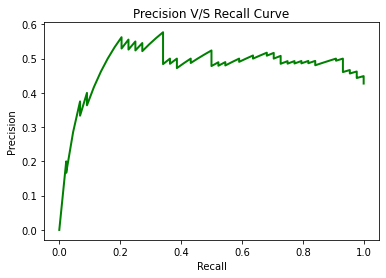

In [55]:
calculate_Prec_Rec(dataframe_id_q4)